In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/Student Attitude and Behavior.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

In [7]:
df.isna().sum()

Certification Course                                      0
Gender                                                    0
Department                                                0
Height(CM)                                                0
Weight(KG)                                                0
10th Mark                                                 0
12th Mark                                                 0
college mark                                              0
hobbies                                                   0
daily studing time                                        0
prefer to study in                                        0
salary expectation                                        0
Do you like your degree?                                  0
willingness to pursue a career based on their degree      0
social medai & video                                      0
Travelling Time                                           0
Stress Level                            

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height(CM),235.0,157.402128,21.510805,4.5,152.0,160.0,170.00,192.0
Weight(KG),235.0,60.803830,14.895844,20.0,50.0,60.0,70.00,106.0
10th Mark,235.0,76.848511,13.047560,7.4,70.0,80.0,86.25,98.0
12th Mark,235.0,68.775872,11.018192,45.0,60.0,69.0,76.00,94.0
college mark,235.0,70.660553,15.727446,1.0,60.0,70.0,80.00,100.0
salary expectation,235.0,32481.680851,111314.628933,0.0,15000.0,20000.0,25000.00,1500000.0


In [9]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in object_columns:
    unique_count = df[col].nunique()
    print(f'{col} has : {unique_count} unique values')

Certification Course has : 2 unique values
Gender has : 2 unique values
Department has : 4 unique values
hobbies has : 4 unique values
daily studing time has : 6 unique values
prefer to study in has : 3 unique values
Do you like your degree? has : 2 unique values
willingness to pursue a career based on their degree   has : 5 unique values
social medai & video has : 6 unique values
Travelling Time  has : 7 unique values
Stress Level  has : 4 unique values
Financial Status has : 4 unique values
part-time job has : 2 unique values


In [10]:
for col in object_columns:
    unique_count = df[col].nunique()
    unique_name = df[col].unique()
    if unique_count == 2:
         print(f'{col} has {unique_name}')

Certification Course has ['No' 'Yes']
Gender has ['Male' 'Female']
Do you like your degree? has ['No' 'Yes']
part-time job has ['No' 'Yes']


In [11]:
def Yes_No(value):
    if(value=='Yes'):
        return 1
    elif(value=='No'):
        return 0

def Gender(value):
    if(value=='Male'):
        return 1
    elif(value=='Female'):
        return 0

df_encoded = df
df_encoded['Certification Course'] = df['Certification Course'].apply(Yes_No)
df_encoded['Do you like your degree?'] = df['Do you like your degree?'].apply(Yes_No)
df_encoded['part-time job'] = df['part-time job'].apply(Yes_No)
df_encoded['Gender'] = df['Gender'].apply(Gender)

In [12]:
categorical_columns = df_encoded.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 44 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Certification Course                                         235 non-null    int64  
 1   Gender                                                       235 non-null    int64  
 2   Height(CM)                                                   235 non-null    float64
 3   Weight(KG)                                                   235 non-null    float64
 4   10th Mark                                                    235 non-null    float64
 5   12th Mark                                                    235 non-null    float64
 6   college mark                                                 235 non-null    float64
 7   salary expectation                                           235 non-null    int

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='12th Mark', ylabel='Count'>

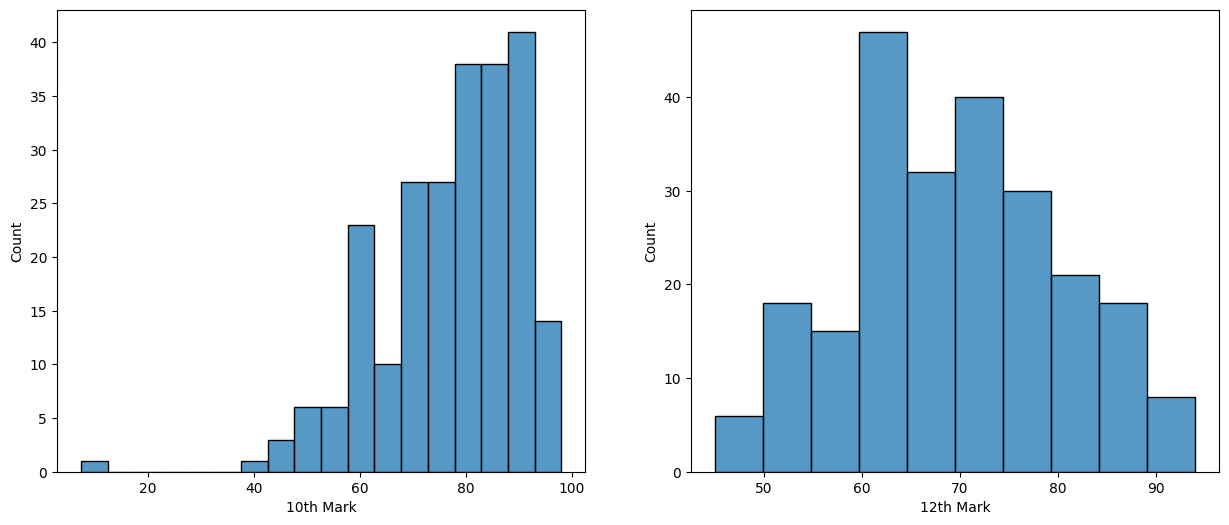

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df,x="10th Mark")
plt.subplot(1, 2, 2)
sns.histplot(data=df,x="12th Mark")

In [15]:
part_time_count = df['part-time job'].value_counts()
part_time_count

part-time job
0    194
1     41
Name: count, dtype: int64

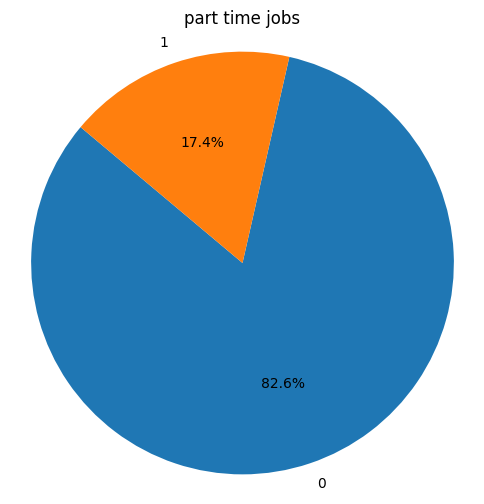

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(part_time_count, labels=part_time_count.index, autopct='%1.1f%%', startangle=140)
plt.title('part time jobs')
plt.axis('equal')
plt.show()

In [17]:
df

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,0,1,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,0,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,0
1,0,0,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,1,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,0
2,1,1,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,1,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,0
3,1,0,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,0,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,0
4,0,1,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,1,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1,1,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,1,50%,More than 2 hour,30 - 60 minutes,Bad,Bad,0
231,1,1,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,1,75%,30 - 60 Minute,30 - 60 minutes,Good,good,0
232,1,0,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,1,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,0
233,1,0,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,1,75%,More than 2 hour,2.30 - 3 hour,Awful,good,0


In [18]:
df_stress = df.groupby(["Stress Level "]).agg({"college mark":["mean"]})
df_stress.columns = ['Mean College Marks']
df_stress

,Mean College Marks
Stress Level,
Awful,70.263158
Bad,68.754412
Good,71.539635
fabulous,72.181818


In [19]:
df_salary_stress = df.groupby(["Stress Level "]).agg({"salary expectation": ["mean"]})
df_salary_stress.columns = ['Mean Salary Exp']
df_salary_stress

,Mean Salary Exp
Stress Level,
Awful,48737.947368
Bad,44000.220588
Good,25358.678832
fabulous,21910.909091


In [20]:
import plotly.express as px

In [21]:
fig = px.bar(df_stress, x=df_stress.index, y=['Mean College Marks'],
             title='College Marks by Stress Level',
             labels={'Stress Level': 'Stress Level', 'value': 'College Mark', 'variable': 'Statistic'},
             barmode='group')

fig.show()

In [22]:
fig = px.bar(df_salary_stress, x=df_salary_stress.index, y=['Mean Salary Exp'],
             title='Salary Expectations by Stress Level',
             labels={'Stress Level': 'Stress Level', 'value': 'salary expectation', 'variable': 'Statistic'},
             barmode='group')

fig.show()

In [23]:
df.columns

Index(['Certification Course', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'hobbies',
       'daily studing time', 'prefer to study in', 'salary expectation',
       'Do you like your degree?',
       'willingness to pursue a career based on their degree  ',
       'social medai & video', 'Travelling Time ', 'Stress Level ',
       'Financial Status', 'part-time job'],
      dtype='object')

In [24]:
fig = px.histogram(df, x="Height(CM)",color="Gender",text_auto=True,title="Height Histogram")
fig.show()

In [25]:
fig = px.histogram(df, x="Weight(KG)",color="Gender",text_auto=True,title="Height Histogram")
fig.show()

Training the model


In [30]:

# For Standard data
from sklearn.preprocessing import StandardScaler

# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# For Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score

In [37]:
# Extracting highly correlated data
correlation = df_encoded.corr()
high_corr_columns = correlation.index[abs(correlation["college mark"]) > 0.1]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[high_corr_columns])
scaled_data = pd.DataFrame(scaled_data, columns=high_corr_columns)

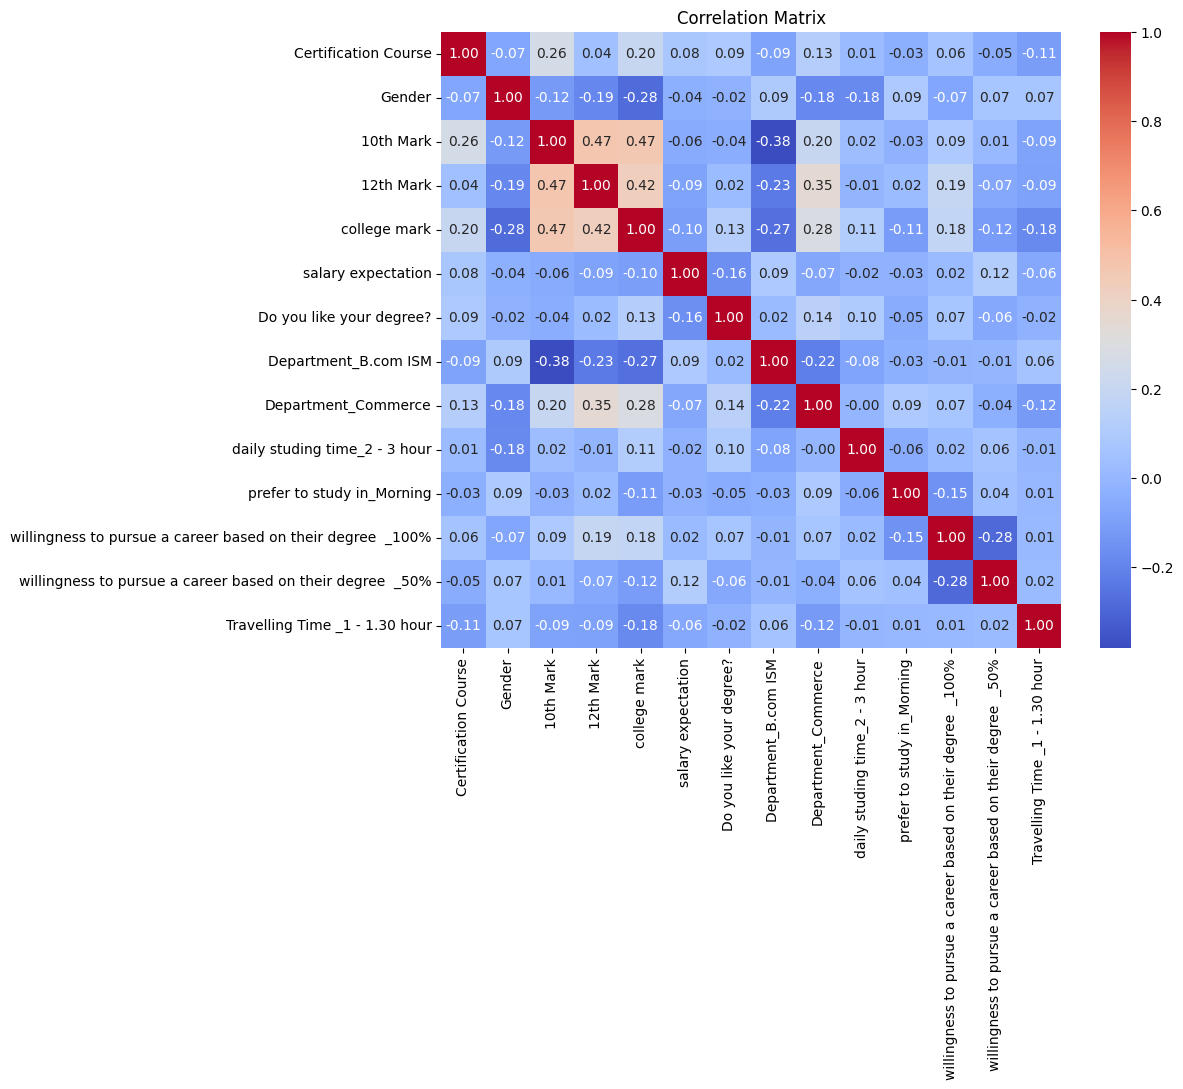

In [44]:
# Calculate correlation matrix
correlation_matrix = df_encoded[high_corr_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
y = scaled_data['college mark']
X = scaled_data.drop(columns=['college mark'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_lgbm = LGBMRegressor(learning_rate=0.05, min_data_in_leaf=30, num_leaves=10, reg_alpha=0.5)
best_lgbm.fit(X_train, y_train)

In [45]:
# Initialize and train the Random Forest model
best_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
best_random_forest.fit(X_train, y_train)

# Generate predictions
predictions_rf = best_random_forest.predict(X_test)

# Calculate evaluation metrics
rmse_rf = mean_squared_error(y_test, predictions_rf) ** 0.5
mae_rf = mean_absolute_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

# Print evaluation results
print("Random Forest RMSE:", round(rmse_rf, 5))
print("Random Forest MAE:", round(mae_rf, 5))
print("Random Forest R2:", round(r2_rf, 5))

Random Forest RMSE: 0.9651
Random Forest MAE: 0.62482
Random Forest R2: 0.2893


In [40]:
predictions = best_lgbm.predict(X_test)

rmse = mean_squared_error(y_test, predictions)**0.5
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE :", round(rmse,5))
print("MAE :", round(mae,5))
print("R2 :", round(r2,5))

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
RMSE : 0.92418
MAE : 0.57245
R2 : 0.34829


In [41]:
predictions = best_lgbm.predict(X_test)

comparison = pd.DataFrame({'actual': y_test, 'pred': predictions})
comparison.head(10)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


,actual,pred
69,-0.679278,-0.918058
207,-0.679278,-0.716227
180,-0.679278,-0.627897
9,-0.042090,-0.598062
127,0.595099,-0.032241
109,-0.042090,0.066934
196,-1.316466,-0.539788
93,-4.024517,-1.001802
223,0.595099,0.326047
15,-0.679278,-0.573612


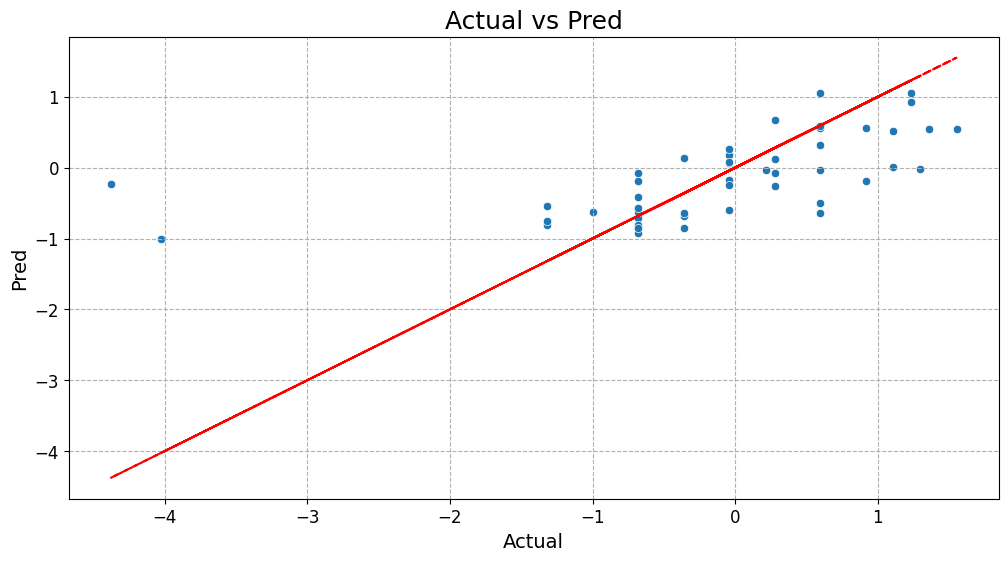

In [42]:
plt.figure(figsize=(12,6))

sns.scatterplot(x='actual', y='pred', data=comparison)
plt.plot(comparison['actual'], comparison['actual'], color='red', linestyle='--')
plt.title('Actual vs Pred', fontsize=18)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Pred', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

<ipython-input-43-6160be5a08d1>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




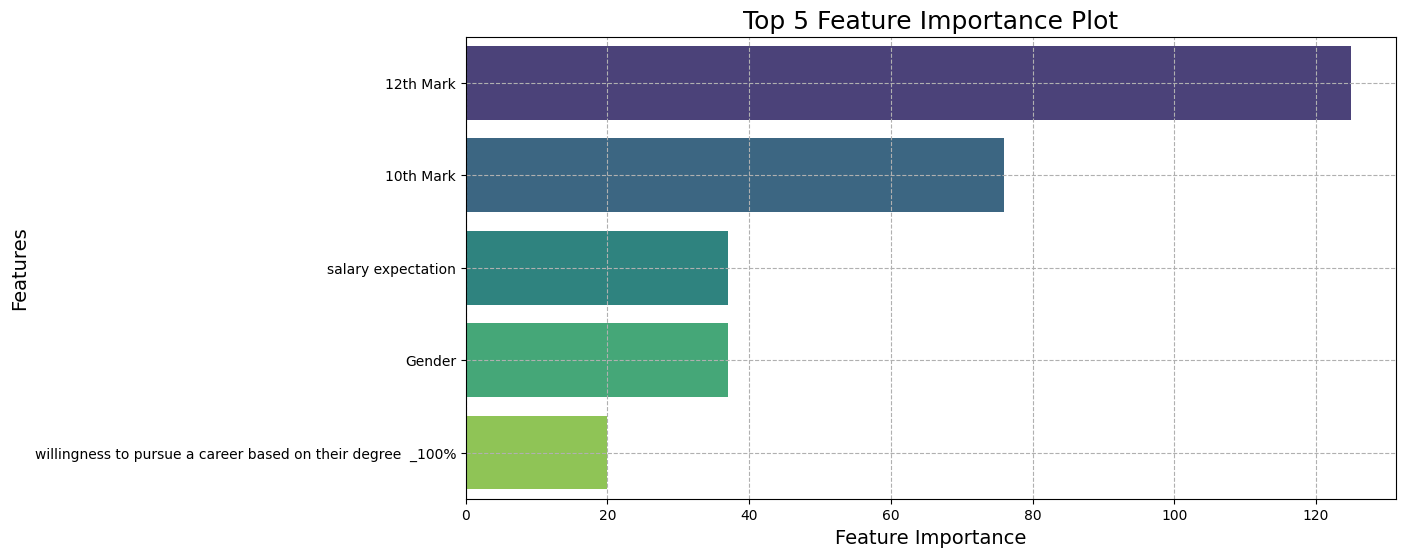

In [43]:
feature_importances = best_lgbm.feature_importances_
sorted_indices = feature_importances.argsort()[::-1][:5]


sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names, orient='h', palette='viridis')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 5 Feature Importance Plot', fontsize=18)
plt.grid(linestyle='--')
plt.show()